# 0.0 Import Libraries

In [1]:
import warnings
import chardet
import datetime          as dt
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt

from IPython.core.display import HTML

In [2]:
warnings.filterwarnings('ignore')

In [24]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize' ] = [16, 8]
    plt.rcParams[ 'font.size' ] = 20
    display( HTML('<style>.container {width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1.0 - Load Dataset

In [4]:
file = 'dados_transito_brazil/Dados_PRF_2022.csv'
file2 = 'dados_transito_brazil/Dados_PRF_2023.csv'

In [5]:
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [6]:
dados = pd.read_csv(file, encoding='ISO-8859-1', sep=';')
dados2 = pd.read_csv(file2, encoding='ISO-8859-1', sep=';')

In [7]:
df = pd.concat([dados, dados2], axis=0, ignore_index=True)

In [8]:
df.sample(3)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
50396,475878,2022-09-21,quarta-feira,20:00:00,MG,381.0,675,PERDOES,Reação tardia ou ineficiente do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Ignorado,Simples,Reta,Sim,1,0,0,0,1,0,0,1,"-21,11551592","-45,09411331",SPRF-MG,DEL04-MG,UOP02-DEL04-MG
12054,476156,2022-09-23,sexta-feira,12:40:00,PI,316.0,352,CAMPO GRANDE DO PIAUI,Pedestre andava na pista,Atropelamento de Pedestre,Com Vítimas Fatais,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Sim,2,1,0,0,1,0,0,1,"-7,12546739","-41,10127504",SPRF-PI,DEL04-PI,UOP03-DEL04-PI
24562,419196,2022-03-07,segunda-feira,10:35:00,MA,316.0,"546,8",CAXIAS,Desrespeitar a preferência no cruzamento,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Interseção de vias,Não,2,0,0,1,1,0,1,2,"-4,875501","-43,395222",SPRF-MA,DEL03-MA,UOP02-DEL03-MA


# 2.0 - Análise Descritiva dos dados

In [9]:
df1 = df.copy()

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96987 entries, 0 to 96986
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      96987 non-null  int64  
 1   data_inversa            96987 non-null  object 
 2   dia_semana              96987 non-null  object 
 3   horario                 96987 non-null  object 
 4   uf                      96987 non-null  object 
 5   br                      96712 non-null  float64
 6   km                      96712 non-null  object 
 7   municipio               96987 non-null  object 
 8   causa_acidente          96987 non-null  object 
 9   tipo_acidente           96987 non-null  object 
 10  classificacao_acidente  96987 non-null  object 
 11  fase_dia                96987 non-null  object 
 12  sentido_via             96987 non-null  object 
 13  condicao_metereologica  96987 non-null  object 
 14  tipo_pista              96987 non-null

In [11]:
# Mudando tipo de dado "data_inversa" para data
df1['data_inversa'] = pd.to_datetime(df1['data_inversa'])

# Alterando coluna indice e br para object
df1['id'] = df1['id'].astype( object )
df1['br'] = df1['br'].astype( object )

## 2.1 - Checando colunas com dados nulos

In [12]:
df1.isna().sum().sort_values(ascending=False)

delegacia                 1061
br                         275
km                         275
uop                         66
regional                     6
uso_solo                     0
longitude                    0
latitude                     0
veiculos                     0
feridos                      0
ignorados                    0
ilesos                       0
feridos_graves               0
feridos_leves                0
mortos                       0
pessoas                      0
id                           0
data_inversa                 0
tipo_pista                   0
condicao_metereologica       0
sentido_via                  0
fase_dia                     0
classificacao_acidente       0
tipo_acidente                0
causa_acidente               0
municipio                    0
uf                           0
horario                      0
dia_semana                   0
tracado_via                  0
dtype: int64

In [13]:
df1.isna().sum() / len(df1)

id                        0.000000
data_inversa              0.000000
dia_semana                0.000000
horario                   0.000000
uf                        0.000000
br                        0.002835
km                        0.002835
municipio                 0.000000
causa_acidente            0.000000
tipo_acidente             0.000000
classificacao_acidente    0.000000
fase_dia                  0.000000
sentido_via               0.000000
condicao_metereologica    0.000000
tipo_pista                0.000000
tracado_via               0.000000
uso_solo                  0.000000
pessoas                   0.000000
mortos                    0.000000
feridos_leves             0.000000
feridos_graves            0.000000
ilesos                    0.000000
ignorados                 0.000000
feridos                   0.000000
veiculos                  0.000000
latitude                  0.000000
longitude                 0.000000
regional                  0.000062
delegacia           

In [14]:
def format_percent(value):
    return f'{ 100 * value:.2f}%'

In [15]:
( df1.isna().sum() / len(df1) ).apply(format_percent).sort_values(ascending=False)

delegacia                 1.09%
br                        0.28%
km                        0.28%
uop                       0.07%
regional                  0.01%
uso_solo                  0.00%
longitude                 0.00%
latitude                  0.00%
veiculos                  0.00%
feridos                   0.00%
ignorados                 0.00%
ilesos                    0.00%
feridos_graves            0.00%
feridos_leves             0.00%
mortos                    0.00%
pessoas                   0.00%
id                        0.00%
data_inversa              0.00%
tipo_pista                0.00%
condicao_metereologica    0.00%
sentido_via               0.00%
fase_dia                  0.00%
classificacao_acidente    0.00%
tipo_acidente             0.00%
causa_acidente            0.00%
municipio                 0.00%
uf                        0.00%
horario                   0.00%
dia_semana                0.00%
tracado_via               0.00%
dtype: object

## 2.2 - Estatística Descritiva dos Dados

In [16]:
dados_num = df1.select_dtypes( include=['int64', 'float64'] )
dados_cat = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 2.2.1 - Estatística Descritiva dos Dados - Numéricos

In [17]:
dados_num.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
pessoas,96987.0,2.42,2.10,1.0,1.0,2.0,3.0,75.0
mortos,96987.0,0.08,0.33,0.0,0.0,0.0,0.0,7.0
feridos_leves,96987.0,0.86,1.08,0.0,0.0,1.0,1.0,61.0
feridos_graves,96987.0,0.28,0.62,0.0,0.0,0.0,0.0,31.0
ilesos,96987.0,1.04,1.68,0.0,0.0,1.0,1.0,58.0
ignorados,96987.0,0.16,0.49,0.0,0.0,0.0,0.0,54.0
feridos,96987.0,1.14,1.20,0.0,1.0,1.0,1.0,62.0
veiculos,96987.0,1.66,0.72,1.0,1.0,2.0,2.0,21.0


### 2.2.2 - Estatística Descritiva dos Dados - Categóricos

In [18]:
# valores unicos de cada categoria
dados_cat.apply( lambda x: x.unique().shape[0])

id                        96987
dia_semana                    7
horario                    1429
uf                           27
br                          118
km                         8193
municipio                  1868
causa_acidente               73
tipo_acidente                16
classificacao_acidente        3
fase_dia                      4
sentido_via                   3
condicao_metereologica       10
tipo_pista                    3
tracado_via                  10
uso_solo                      2
latitude                  46955
longitude                 46973
regional                     29
delegacia                   148
uop                         398
dtype: int64

# 3.0 - Análise Exploratória de Dados

### 3.1. Transformando dados 

In [19]:
df2 = df1.copy()

In [20]:
# convertendo em data
df2['data_inversa'] = pd.to_datetime(df2['data_inversa'])
# ano
df2['ano'] = df2['data_inversa'].dt.year

# mes
df2['mes'] = df2['data_inversa'].dt.month

# dia
df2['dia'] = df2['data_inversa'].dt.day

# ano/mes
df2['ano_mes'] = df2['data_inversa'].dt.strftime('%Y-%m')

In [21]:
dados_num = df2.select_dtypes( include=['int64', 'float64'] )
dados_cat = df2.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

#### Dados numericos

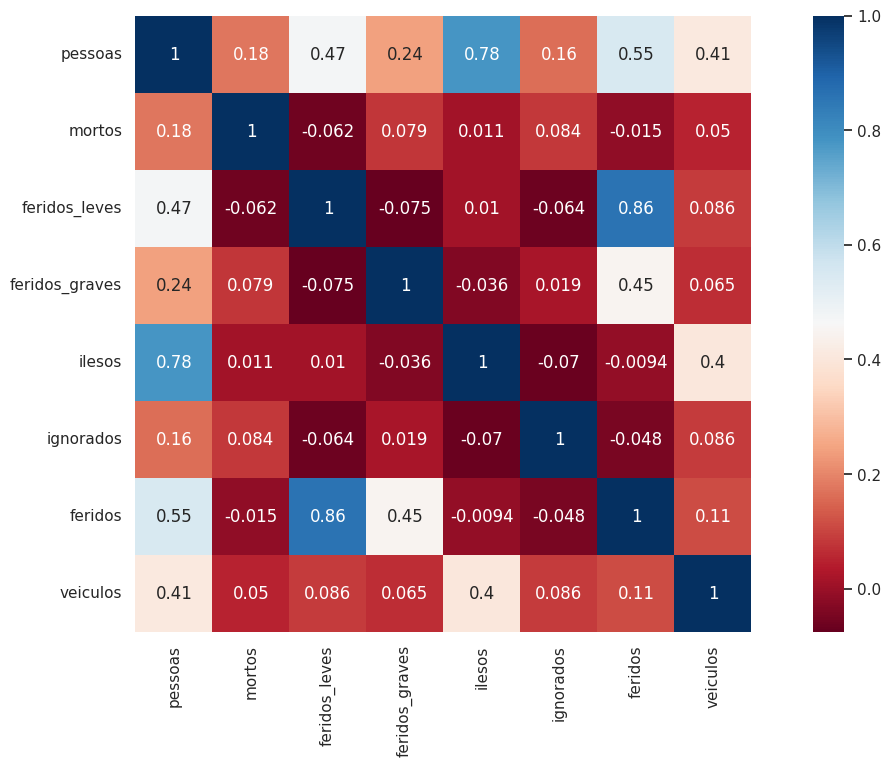

In [27]:
sns.heatmap(data=dados_num.corr(), square=True, cmap='RdBu', annot=True);

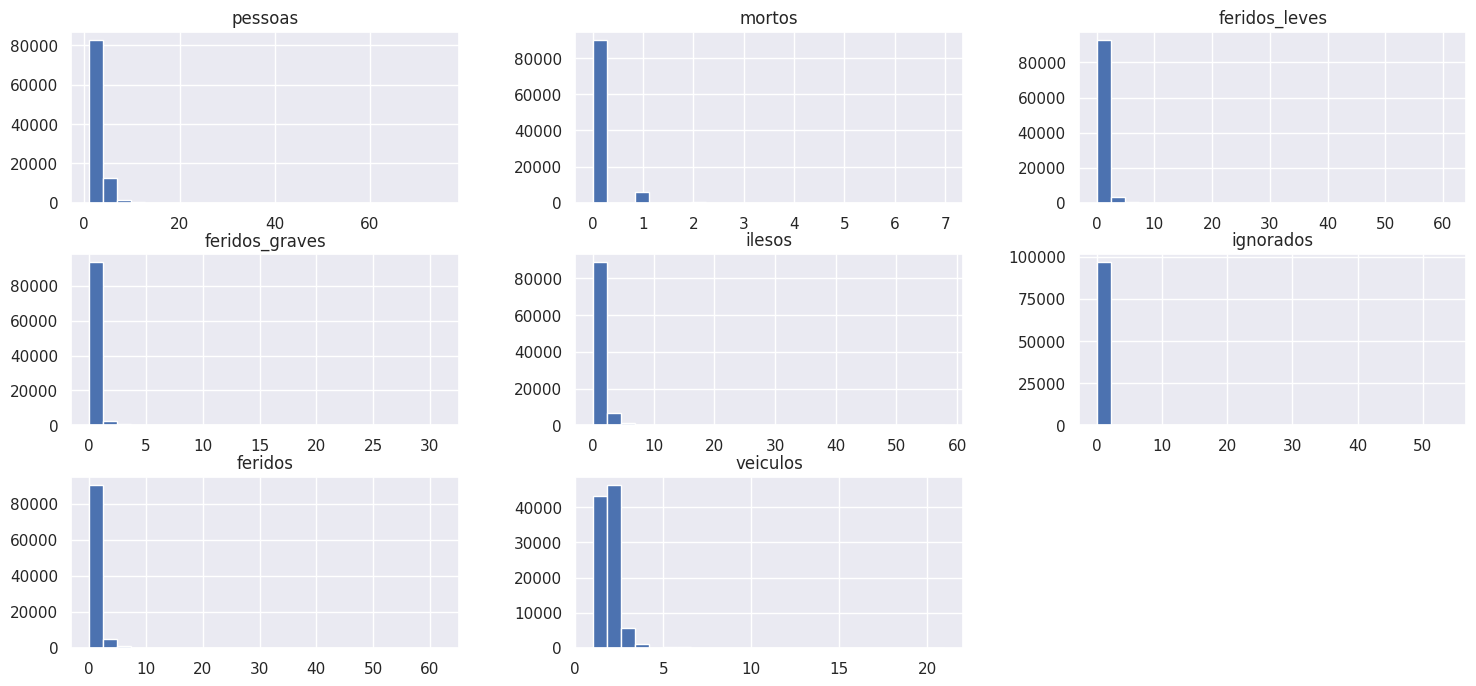

In [23]:
dados_num.hist( bins=25 );

#### Dados categoricos

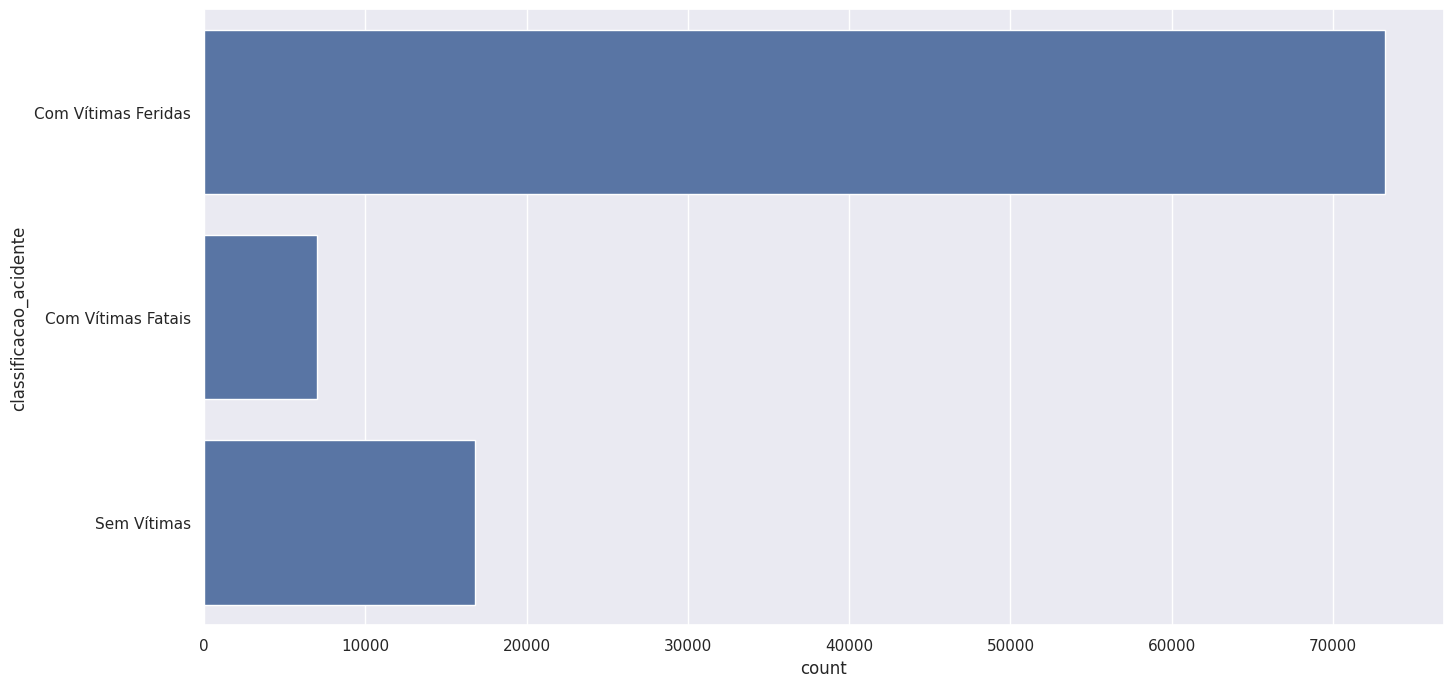

In [28]:
df2['classificacao_acidente'].drop_duplicates()
sns.countplot(df2['classificacao_acidente']);

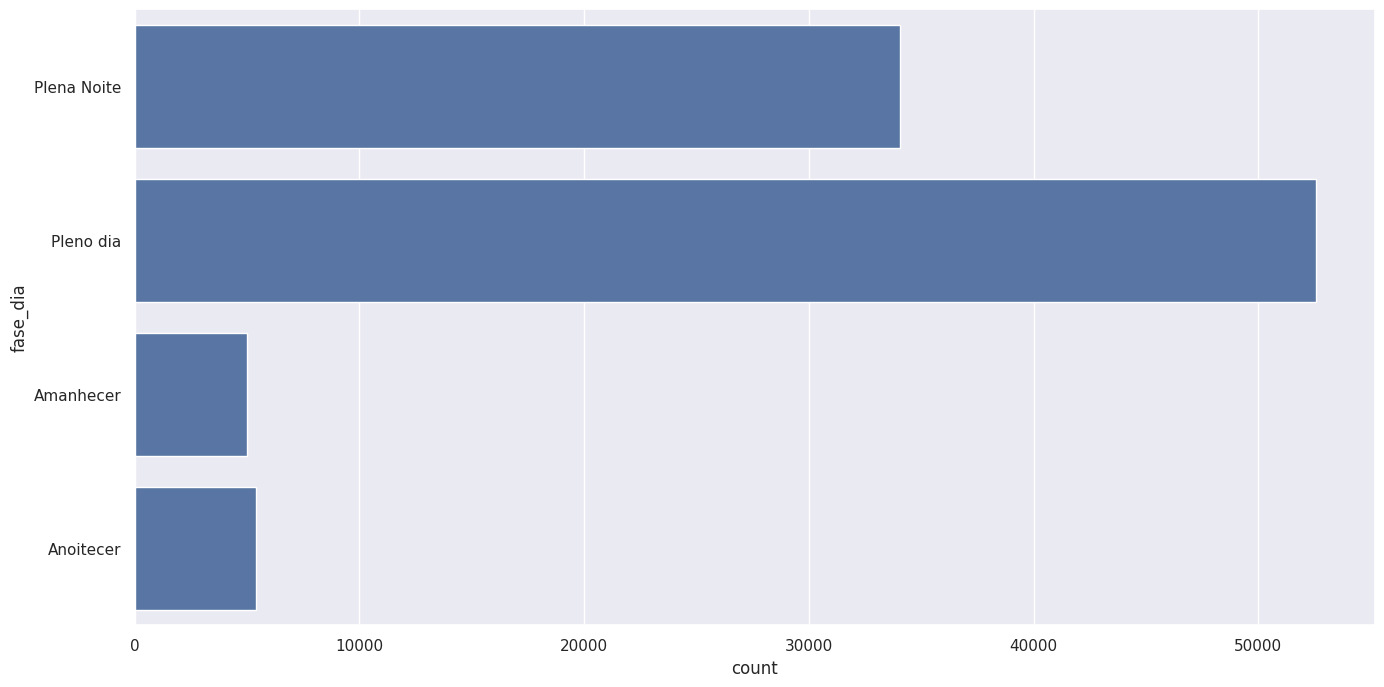

In [29]:
df2['fase_dia'].drop_duplicates()
sns.countplot(df2['fase_dia']);

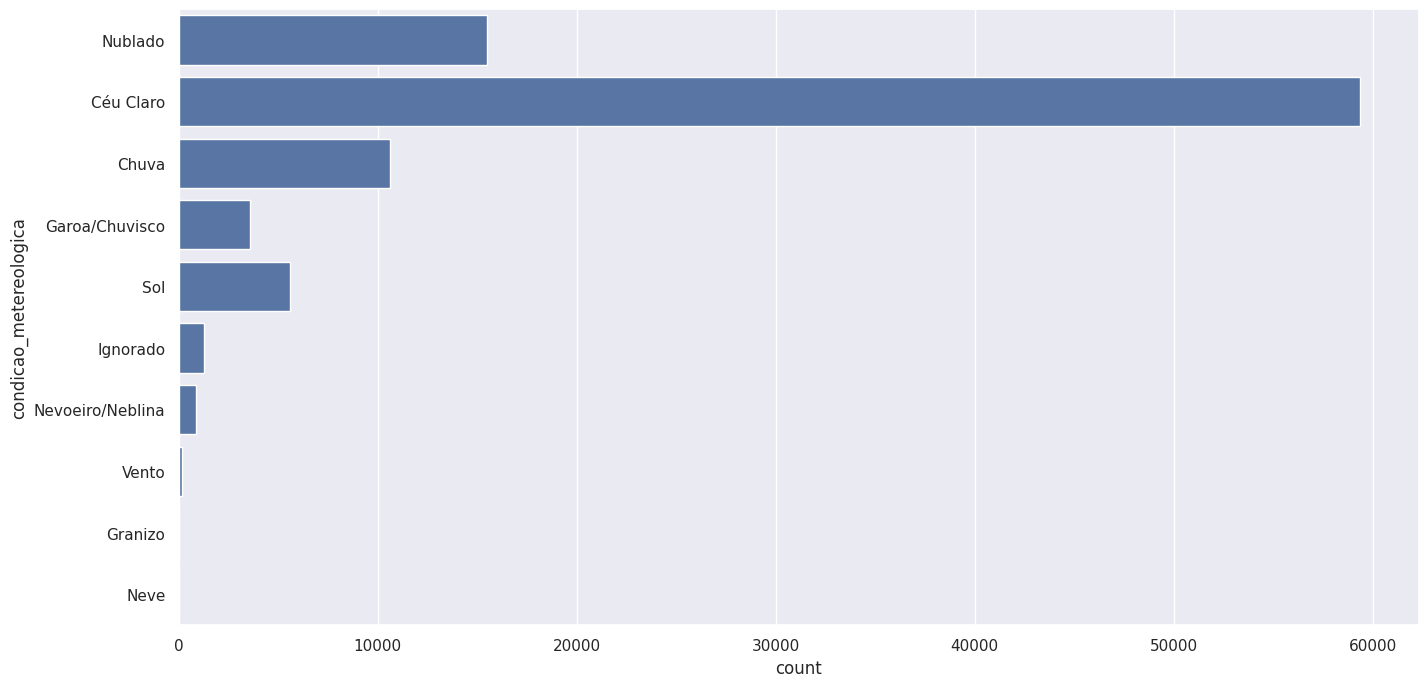

In [30]:
df2['condicao_metereologica'].drop_duplicates()
sns.countplot(df2['condicao_metereologica']);

# 3.0 - Explorando e respondendo perguntas a partir dos dados

## 1. Quais rodovias mais perigosas?

In [31]:
# top 5 rodovias que tiveram mais acidentes
df2.groupby('br')['id'].count().sort_values(ascending=False).reset_index().head(5)

,br,id
0,101.0,16405
1,116.0,15030
2,40.0,4645
3,381.0,4604
4,153.0,3683


In [32]:
# top 5 rodovias que tiveram mais pessoas envolvidas
df2.groupby('br')['pessoas'].sum().sort_values(ascending=False).reset_index().head(5)

,br,pessoas
0,101.0,38420
1,116.0,35566
2,40.0,11224
3,381.0,11030
4,153.0,9321


In [33]:
# top 5 rodovias que tiveram mais feridos leves + feridos graves
df2.groupby('br')[['feridos_leves', 'feridos_graves']].sum().sort_values(ascending=False, by='feridos_leves').reset_index().head(5)

,br,feridos_leves,feridos_graves
0,101.0,14072,4375
1,116.0,12998,3286
2,40.0,4428,1204
3,381.0,4328,1042
4,153.0,3384,1035


In [34]:
# top 5 rodovias que tiveram mais mortos
df2.groupby('br')['mortos'].sum().sort_values(ascending=False).head(5)

br
116.0    1011
101.0     934
163.0     346
153.0     346
40.0      277
Name: mortos, dtype: int64

### 2. Quais as causas de acidentes mais comuns?

In [35]:
df2.groupby('causa_acidente')['id'].count().sort_values(ascending=False).reset_index().head(5)

,causa_acidente,id
0,Reação tardia ou ineficiente do condutor,13079
1,Ausência de reação do condutor,11902
2,Acessar a via sem observar a presença dos outr...,8599
3,Velocidade Incompatível,7122
4,Condutor deixou de manter distância do veículo...,6410


### 3. Existe um período ou época do ano que aumentam as ocorrências?

In [36]:
df2.groupby(['ano_mes'])['id'].count().sort_values(ascending=False).reset_index()

,ano_mes,id
0,2022-12,5822
1,2022-10,5783
2,2023-06,5667
3,2022-07,5657
4,2022-08,5605
5,2023-05,5602
6,2023-04,5594
7,2023-03,5583
8,2022-09,5525
9,2022-05,5397


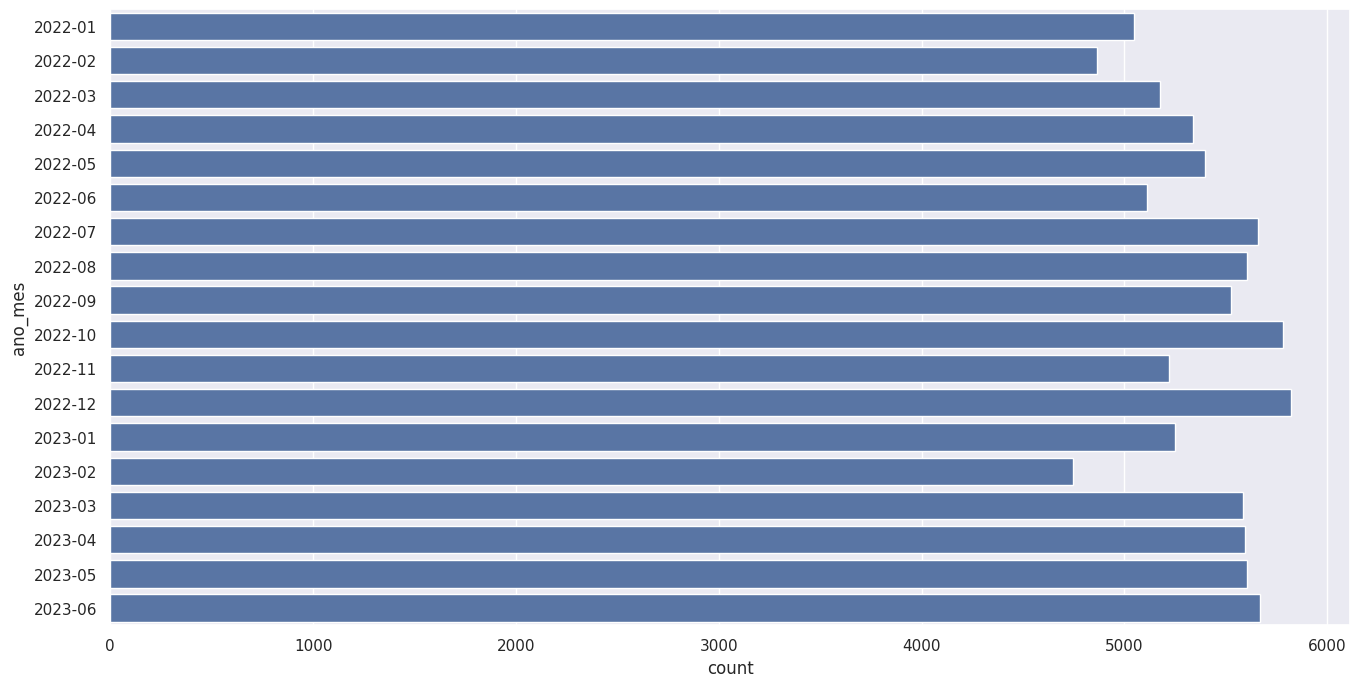

In [37]:
df2['ano_mes'].drop_duplicates()
sns.countplot(df2['ano_mes']);

In [38]:
df2.groupby(['dia_semana'])['id'].count().sort_values(ascending=False).reset_index()

,dia_semana,id
0,domingo,16344
1,sábado,16068
2,sexta-feira,14910
3,segunda-feira,13348
4,quinta-feira,12559
5,quarta-feira,12040
6,terça-feira,11718


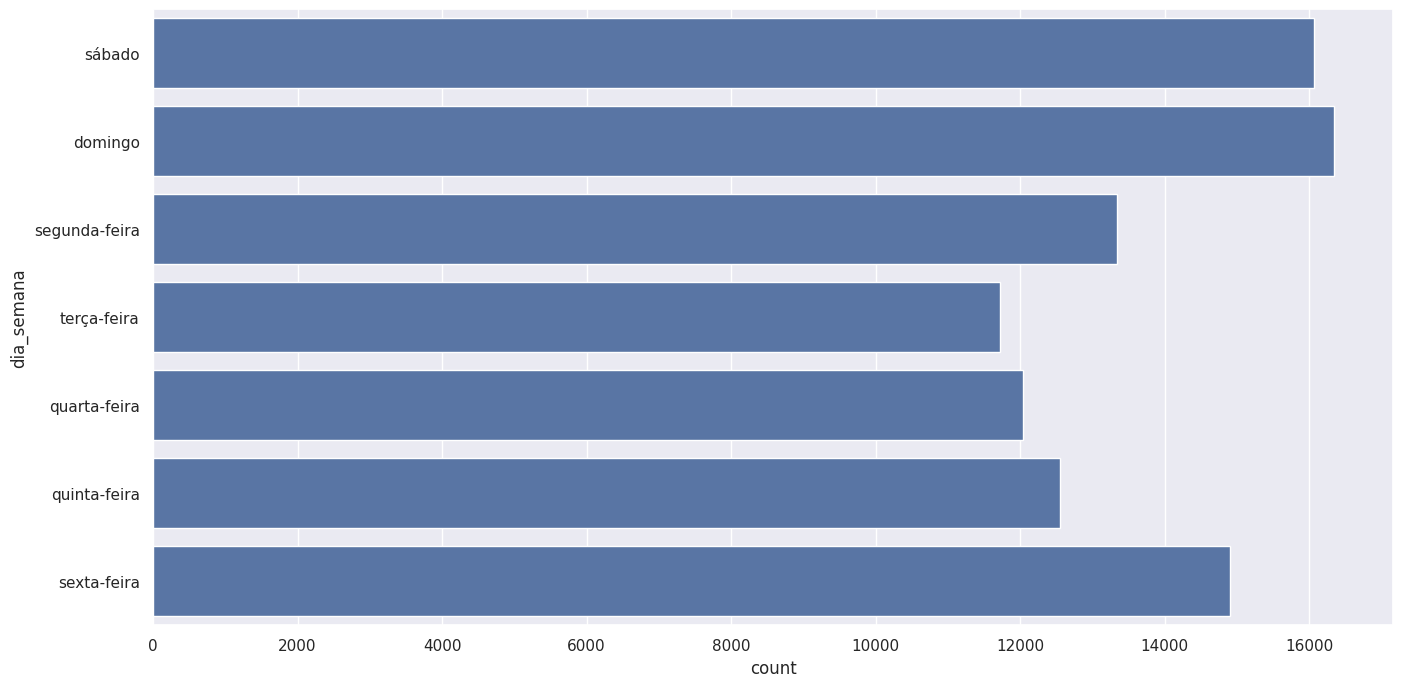

In [39]:
df2['dia_semana'].drop_duplicates()
sns.countplot(df2['dia_semana']);

### 4. Qual a proporção de acidentes com vítimas fatais?

In [40]:
total_acidentes = df2['id'].count()
total_acidentes

96987

In [41]:
vitimas_fatais = (df2['classificacao_acidente'] == 'Com Vítimas Fatais').sum()
vitimas_fatais

6981

In [42]:
( vitimas_fatais / total_acidentes ) * 100

7.19787187973646